# Regression
## 회귀: 데이터 값이 평균과 같은 일정한 값으로 회귀하려는 경향을 이용한 통계학 기법
 -> 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법

Y = W * X1 에서
Y : 종속변수
X1 : 독립변수
W : 회귀 계수

회귀 예측은 적절한 회귀 계수를 찾아내는 것이 핵심
분류와의 차이 - 분류는 예측값이 이산값, 회귀는 연속형 숫자 값

## 선형 회귀 모델
- 일반 선형 모델: 회귀 계수를 예측값과 실제 값이 차이를 줄이는 방식으로 최적화, 규제 없음
- 릿지: 선형 회귀에 L2 규제 (큰 회귀값의 예측 영향도 감소)를 추가한 회귀 모델
- 라쏘: 선형 회귀에 L1 규제 (예측 영향력이 작은 회귀 계수 0)를 추가한 회귀 모델
- 엘라스틱넷: L1, L2 규제 결합
- 로지스틱 회귀: 분류에 사용되는 선형 모델

# 단순 선형 회귀를 통한 회귀 이해
독립변수 1개인 경우: 함수의 기울기와 y절편이 회귀 계수
잔차 (|실제 값 - 회귀 모델|) 합의 최소화
=> 오류의 합은 잔차의 절대값, 혹은 잔차 제곰의 합으로 구함

RSS는 회귀에서 비용임
비용 함수 (손실 함수): w 변수로 구성되는 RSS

# 경사 하강법 (Gradient Descent)

고차원 방정식을 해결하기 위한 방법
점진적으로 반복적인 계산을 통해 W 파라미터값 업데이트 -> 오류 값이 최소가 되는 W 파라미터 구함
미분 값이 계속 감소하는 방향으로 순차적으로 w를 업데이트

-> 각 변수(w)의 편미분한 결과를 반복적으로 보정하면서 R(w)가 최소가 되는 w1, w0 를 구함

## 경사하강법의 구현

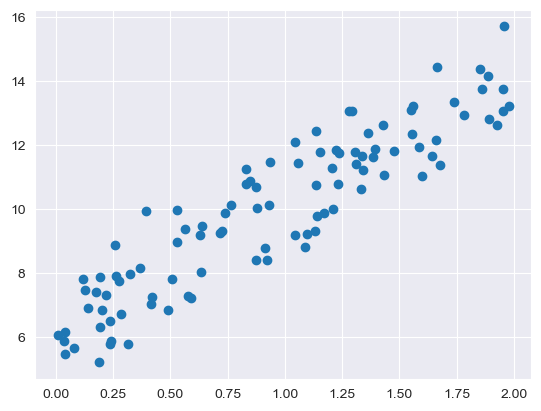

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4x + 6 (w1 = 4, w0 = 6)
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + + np.random.randn(100, 1)

plt.scatter(X, y)

In [7]:
print(X)

[[1.09762701]
 [1.43037873]
 [1.20552675]
 [1.08976637]
 [0.8473096 ]
 [1.29178823]
 [0.87517442]
 [1.783546  ]
 [1.92732552]
 [0.76688304]
 [1.58345008]
 [1.05778984]
 [1.13608912]
 [1.85119328]
 [0.14207212]
 [0.1742586 ]
 [0.04043679]
 [1.66523969]
 [1.5563135 ]
 [1.7400243 ]
 [1.95723668]
 [1.59831713]
 [0.92295872]
 [1.56105835]
 [0.23654885]
 [1.27984204]
 [0.28670657]
 [1.88933783]
 [1.04369664]
 [0.82932388]
 [0.52911122]
 [1.54846738]
 [0.91230066]
 [1.1368679 ]
 [0.0375796 ]
 [1.23527099]
 [1.22419145]
 [1.23386799]
 [1.88749616]
 [1.3636406 ]
 [0.7190158 ]
 [0.87406391]
 [1.39526239]
 [0.12045094]
 [1.33353343]
 [1.34127574]
 [0.42076512]
 [0.2578526 ]
 [0.6308567 ]
 [0.72742154]
 [1.14039354]
 [0.87720303]
 [1.97674768]
 [0.20408962]
 [0.41775351]
 [0.32261904]
 [1.30621665]
 [0.50658321]
 [0.93262155]
 [0.48885118]
 [0.31793917]
 [0.22075028]
 [1.31265918]
 [0.2763659 ]
 [0.39316472]
 [0.73745034]
 [1.64198646]
 [0.19420255]
 [1.67588981]
 [0.19219682]
 [1.95291893]
 [0.93

In [3]:
# define function

def get_cost(y, y_prd):
    N = len(y)
    cost = np.sum(np.square(y - y_prd)) / N
    return cost

In [9]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # Initialize zero matrix
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # Calculate estimated matrix, difference
    y_prd = np.dot(X, w1.T) + w0
    diff = y - y_prd

    # new metrix to calculate dot in w0_update
    w0_factors = np.ones((N, 1))

    # Update w1 and w0
    w1_update = -(2 / N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2 / N) * learning_rate * (np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [10]:
# Iteratively apply update
def gradient_descent_steps(X, y, iters=10000):
    # Initialize
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))

    # Iteratively
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [12]:
def get_cost(y, y_prd):
    N = len(y)
    cost = np.sum(np.square(y - y_prd)) / N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1: {0:.3f}, w0: {1:.3f}".format(w1[0, 0], w0[0, 0]))
y_prd = w1[0, 0] * X + w0
print("Gradient Descent Total Cost: {0:.4f}".format(get_cost(y, y_prd)))

w1: 4.022, w0: 6.162
Gradient Descent Total Cost: 0.9935


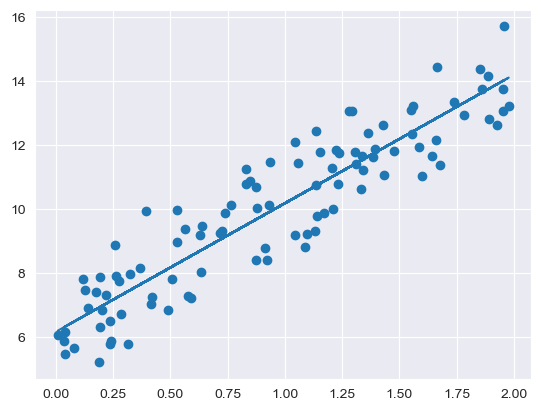

In [14]:
plt.scatter(X, y)
plt.plot(X, y_prd)

실제로 경사 하강법은 값 업데이트로 인해 수행시간이 매우 오래 걸림.
확률적 경사 하강법을 실전에서 주로 이용: 일부 데이터만 이용해 w가 업데이트되는 값을 계산

미니 배치 확률적 경사 하강법

In [15]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    prev_cost = 100000
    iter_index = 0

    for ind in range(iters):
        np.random.seed(ind)
        # randomly pick up batch_size -> save to sample_X, sample_Y
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]

        # calculate w1_update, w0_update and update
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [17]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1: {0}, w0: {1}".format(round(w1[0, 0], 3), round(w0[0, 0], 3)))
y_prd = w1[0, 0] * X + w0
print("Stochastic Gradient Descent Total Cost: {0:.4f}".format(get_cost(y, y_prd)))

w1: 4.028, w0: 6.156
Stochastic Gradient Descent Total Cost: 0.9937


예측 변수가 여러 개라면?
회귀 계수가 많아지더라도 선형대수 이용해서 도출 가능